CLUSTERING CON DBSCAN

In [247]:
import pandas as pd
import numpy as np

In [248]:
df = pd.read_csv("players_21.csv")
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,league_name,league_rank,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,...,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,Spain Primera Division,1.0,93,93,67500000,560000,"RW, ST, CF",Left,5,4,4,Medium/Low,Messi,Yes,138400000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...",CAM,10.0,NaN,2004-07-01,2021.0,RW,10.0,85.0,92.0,91.0,95.0,38.0,65.0,NaN,...,44,40,93,95,75,96,NaN,35,24,6,11,15,14,8,89+3,89+3,89+3,92+0,93+0,93+0,93+0,92+0,93+0,93+0,93+0,91+2,87+3,87+3,87+3,91+2,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,Italian Serie A,1.0,92,92,46000000,220000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,75900000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...",LS,7.0,NaN,2018-07-10,2022.0,LS,7.0,89.0,93.0,81.0,89.0,35.0,77.0,NaN,...,63,29,95,82,84,95,NaN,32,24,7,11,15,14,11,91+1,91+1,91+1,89+0,91+0,91+0,91+0,89+0,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,1993-01-07,188,87,Slovenia,Atlético Madrid,Spain Primera Division,1.0,91,93,75000000,125000,GK,Right,3,3,1,Medium/Medium,PLAYER_BODY_TYPE_259,Yes,159400000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,...,34,19,11,65,11,68,NaN,12,18,87,92,78,90,90,33+3,33+3,33+3,32+0,35+0,35+0,35+0,32+0,38+3,38+3,38+3,35+3,38+3,38+3,38+3,35+3,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,German 1. Bundesliga,1.0,91,91,80000000,240000,ST,Right,4,4,4,High/Medium,PLAYER_BODY_TYPE_276,Yes,132000000.0,"#Distance Shooter, #Clinical Finisher",ST,9.0,NaN,2014-07-01,2023.0,NaN,NaN,78.0,91.0,78.0,85.0,43.0,82.0,NaN,...,81,49,94,79,88,88,NaN,42,19,15,6,12,8,10,89+2,89+2,89+2,85+0,87+0,87+0,87+0,85+0,85+3,85+3,85+3,83+3,79+3,79+3,79+3,83+3,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,28,1992-02-05,175,68,Brazil,Paris Saint-Germain,French Ligue 1,1.0,91,91,90000000,270000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,166500000.0,"#Speedster, #Dribbler, #Playmaker, #FK Special...",LW,10.0,NaN,2017-08-03,2022.0,NaN,NaN,91.0,85.0,86.0,94.0,36.0,59.0,NaN,...,51,36,87,90,92,93,NaN,30,29,9,9,15,15,11,84+3,84+3,84+3,90+0,89+0,89+0,89+0,90+0,90+1,90+1,90+1,90+1,83+3,83+3,83+3,90+1,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3


In [249]:
columns_names = df.columns.values
print(columns_names)

['sofifa_id' 'player_url' 'short_name' 'long_name' 'age' 'dob' 'height_cm'
 'weight_kg' 'nationality' 'club_name' 'league_name' 'league_rank'
 'overall' 'potential' 'value_eur' 'wage_eur' 'player_positions'
 'preferred_foot' 'international_reputation' 'weak_foot' 'skill_moves'
 'work_rate' 'body_type' 'real_face' 'release_clause_eur' 'player_tags'
 'team_position' 'team_jersey_number' 'loaned_from' 'joined'
 'contract_valid_until' 'nation_position' 'nation_jersey_number' 'pace'
 'shooting' 'passing' 'dribbling' 'defending' 'physic' 'gk_diving'
 'gk_handling' 'gk_kicking' 'gk_reflexes' 'gk_speed' 'gk_positioning'
 'player_traits' 'attacking_crossing' 'attacking_finishing'
 'attacking_heading_accuracy' 'attacking_short_passing'
 'attacking_volleys' 'skill_dribbling' 'skill_curve' 'skill_fk_accuracy'
 'skill_long_passing' 'skill_ball_control' 'movement_acceleration'
 'movement_sprint_speed' 'movement_agility' 'movement_reactions'
 'movement_balance' 'power_shot_power' 'power_jumping' 'pow

In [250]:
df = df[['short_name','age', 'height_cm', 'weight_kg', 'overall',
         'potential','value_eur', 'wage_eur', 'international_reputation', 
         'weak_foot','skill_moves', 'release_clause_eur', 'team_jersey_number',
         'contract_valid_until', 'nation_jersey_number', 'pace', 'shooting',
         'passing', 'dribbling', 'defending', 'physic', 'gk_diving','gk_handling',
         'gk_kicking', 'gk_reflexes', 'gk_speed','gk_positioning', 'attacking_crossing',
         'attacking_finishing','attacking_heading_accuracy', 'attacking_short_passing',
         'attacking_volleys', 'skill_dribbling', 'skill_curve','skill_fk_accuracy', 
         'skill_long_passing','skill_ball_control','movement_acceleration', 'movement_sprint_speed', 
         'movement_agility','movement_reactions', 'movement_balance', 'power_shot_power','power_jumping',
         'power_stamina', 'power_strength', 'power_long_shots','mentality_aggression', 
         'mentality_interceptions','mentality_positioning', 'mentality_vision', 
         'mentality_penalties','mentality_composure', 'defending_marking',
         'defending_standing_tackle','defending_sliding_tackle', 'goalkeeping_diving',
         'goalkeeping_handling', 'goalkeeping_kicking','goalkeeping_positioning', 'goalkeeping_reflexes']]

In [251]:
df.head(3)

,short_name,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,L. Messi,33,170,72,93,93,67500000,560000,5,4,4,138400000.0,10.0,2021.0,10.0,85.0,92.0,91.0,95.0,38.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,NaN,35,24,6,11,15,14,8
1,Cristiano Ronaldo,35,187,83,92,92,46000000,220000,5,4,5,75900000.0,7.0,2022.0,7.0,89.0,93.0,81.0,89.0,35.0,77.0,NaN,NaN,NaN,NaN,NaN,NaN,84,95,90,82,86,88,81,76,77,92,87,91,87,95,71,94,95,84,78,93,63,29,95,82,84,95,NaN,32,24,7,11,15,14,11
2,J. Oblak,27,188,87,91,93,75000000,125000,3,3,1,159400000.0,13.0,2023.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,90.0,52.0,90.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,NaN,12,18,87,92,78,90,90


In [252]:
#seleccionar los mejores jugadores (overall>85)
df = df[df.overall > 85] 

In [253]:
#imputar los NAN
df = df.fillna(df.mean())

In [254]:
#guardar nombres en otro dataframe
nombres = df.short_name.tolist() 
df = df.drop(['short_name'], axis = 1) # eliminar columna names
df.head()

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,33,170,72,93,93,67500000,560000,5,4,4,138400000.0,10.0,2021.0,10.000000,85.00,92.0,91.0,95.00,38.0,65.0,86.583333,85.0,80.083333,88.75,53.583333,86.416667,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,NaN,35,24,6,11,15,14,8
1,35,187,83,92,92,46000000,220000,5,4,5,75900000.0,7.0,2022.0,7.000000,89.00,93.0,81.0,89.00,35.0,77.0,86.583333,85.0,80.083333,88.75,53.583333,86.416667,84,95,90,82,86,88,81,76,77,92,87,91,87,95,71,94,95,84,78,93,63,29,95,82,84,95,NaN,32,24,7,11,15,14,11
2,27,188,87,91,93,75000000,125000,3,3,1,159400000.0,13.0,2023.0,1.000000,76.84,75.1,79.6,82.64,62.0,74.6,87.000000,92.0,78.000000,90.00,52.000000,90.000000,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,NaN,12,18,87,92,78,90,90
3,31,184,80,91,91,80000000,240000,4,4,4,132000000.0,9.0,2023.0,8.081081,78.00,91.0,78.0,85.00,43.0,82.0,86.583333,85.0,80.083333,88.75,53.583333,86.416667,71,94,85,84,89,85,79,85,70,88,77,78,77,93,82,89,84,76,86,85,81,49,94,79,88,88,NaN,42,19,15,6,12,8,10
4,28,175,68,91,91,90000000,270000,5,5,5,166500000.0,10.0,2022.0,8.081081,91.00,85.0,86.0,94.00,36.0,59.0,86.583333,85.0,80.083333,88.75,53.583333,86.416667,85,87,62,87,87,95,88,89,81,95,94,89,96,91,83,80,62,81,50,84,51,36,87,90,92,93,NaN,30,29,9,9,15,15,11


In [255]:
#salta error con NAN"
"defending_marking" #chequear (en otros notebooks vimos que hay que dropear)#
#esta columna, estoda NAN eliminar 
df = df.drop(['defending_marking'], axis=1)

In [256]:
#ESTANDARIZAR DATOS
from sklearn import preprocessing
x = df.values # numpy array
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
X_norm = pd.DataFrame(x_scaled)

In [257]:
#USAR PCA PARA REDUCIR DIMENSIONALIDAD DEL DATA SET A 2
from sklearn.decomposition import PCA
pca = PCA(n_components = 2) # 2D PCA for the plot
reduced = pd.DataFrame(pca.fit_transform(X_norm))

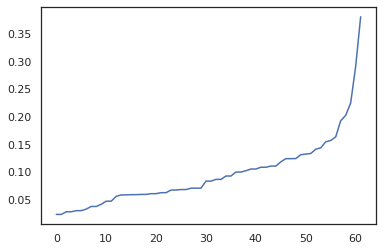

In [258]:
#encontrar optimo de Epsilon
#calculando la distancia de los n puntos mas cercanos a cada punto
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors = 2)

nbrs = nn.fit(reduced)

distances, indices = nbrs.kneighbors(reduced)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

A PARTiR DE EPS  = 0.15 hay un quiebre de curvatura. optimo de eps. CORRER DBSCAN CON eps = 0.15 (optimo)

In [259]:
from sklearn.cluster import DBSCAN

db= DBSCAN(eps=0.15, min_samples=4)

db_clusters = db.fit_predict(reduced)
reduced['cluster'] = db_clusters
reduced['name'] = nombres
reduced.columns = ['x', 'y', 'cluster', 'name']
reduced.head()

,x,y,cluster,name
0,-1.333865,-1.338417,-1,L. Messi
1,-1.108930,-0.972901,2,Cristiano Ronaldo
2,2.948567,-0.557769,-1,J. Oblak
3,-0.986294,-0.605106,0,R. Lewandowski
4,-1.246090,-1.366755,-1,Neymar Jr


/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


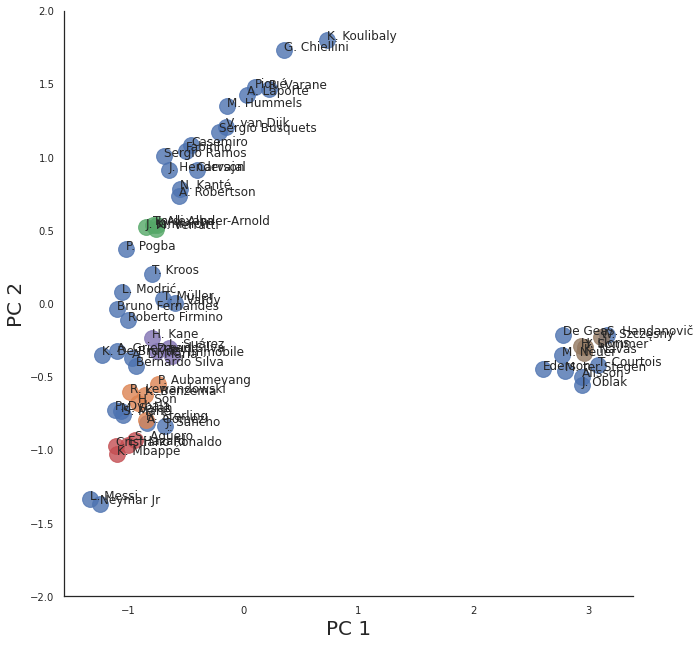

In [260]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="white")
ax = sns.lmplot(x="x", y="y", hue='cluster', data = reduced, legend=False,fit_reg=False, size = 9, scatter_kws={"s": 250})
texts = []
for x, y, s in zip(reduced.x, reduced.y, reduced.name):
    texts.append(plt.text(x, y, s))

ax.set(ylim=(-2, 2))
plt.tick_params(labelsize=10)
plt.xlabel("PC 1", fontsize = 20)
plt.ylabel("PC 2", fontsize = 20)
plt.show()


## **DBSCAN SEPARA LOS ARQUEROS TAL CUAL LOS OTROS ALGORTIMOS USADOS ANTERIORMENTE. PARECIERA QUE DBSCAN DETECTA OUTLIERS DENTRO DE LOS CLUSTERS 